1. `torchvision` base domain lib for computer vision
2. `torchvision.datasets` for datasets and data loading fucntions
3. `torchvision.models` get pretrained CV models that you can leverage for your own problems
4. `torchvision.transforms` funtn for manipulating your ision data


In [1]:
import numpy
import torch
from networkx.classes.filters import hide_edges
from torch import nn

import torchvision
from torchvision import transforms,datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


print(torch.__version__,torchvision.__version__)

2.9.0.dev20250813 0.24.0.dev20250813


In [2]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

# Getting dataset
fasionMNIST dataset

In [3]:
traindata = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

testdata = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [4]:
len(traindata),len(testdata)

(60000, 10000)

In [5]:
image , labels = traindata[0]
image,labels

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
classnames = traindata.classes
classnames

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
classtoidx = traindata.class_to_idx
classtoidx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
traindata.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image.shape,labels

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Ankle boot')

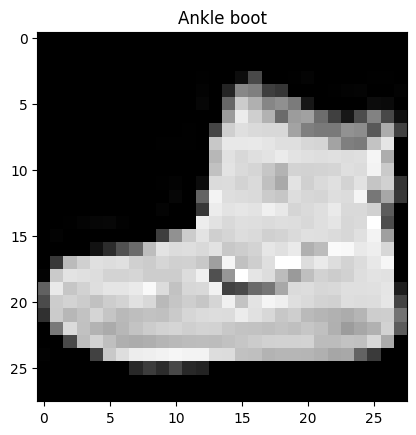

In [10]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(classnames[labels])

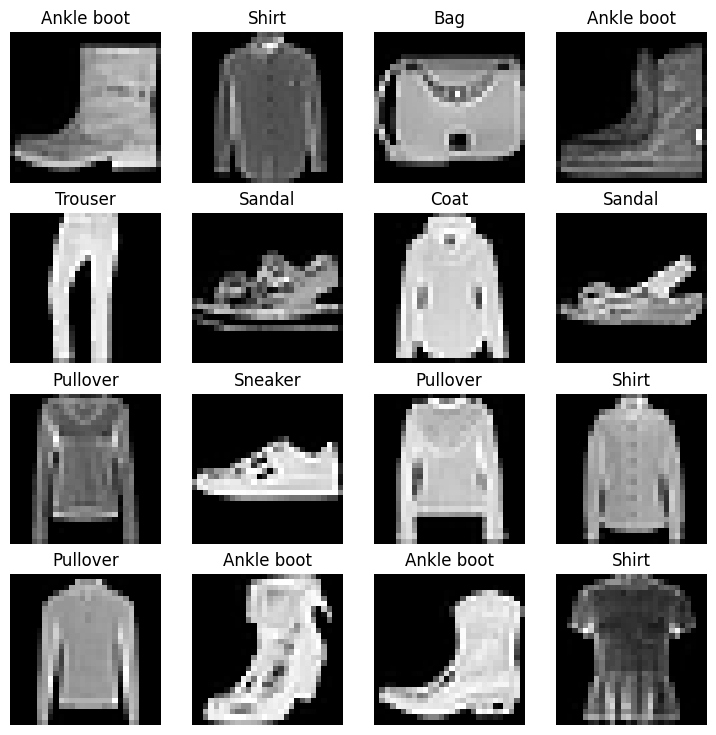

In [11]:
torch.manual_seed(42)
rows,cols = 4,4
fig = plt.figure(figsize=(9,9))
for i in range(1,rows*cols+1):
    randomidx = torch.randint(0,len(traindata),size=[1]).item()
    img , label = traindata[randomidx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(classnames[label])
    plt.axis('off')

# prepare dataloader
turning above data to pytorch datasets <br>
dtaloader turns our data into python iterable

In [12]:
from torch.utils.data import DataLoader, dataloader

batchsize = 32
traindataloader = DataLoader(traindata,batch_size=batchsize,shuffle=True)
testdataloader = DataLoader(testdata,batch_size=batchsize,shuffle=False)
len(traindataloader),len(testdataloader)

(1875, 313)

In [13]:
trainbatch,trainlabelbatch = next(iter(traindataloader))
trainbatch.shape,trainlabelbatch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

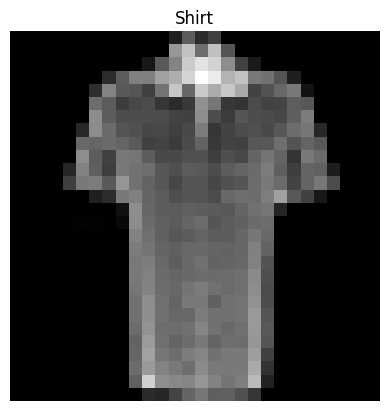

In [14]:
torch.manual_seed(42)
randidx = torch.randint(0,len(trainbatch),size=[1]).item()
img ,label = trainbatch[randidx],trainlabelbatch[randidx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(classnames[label])
plt.axis('off')

baseline model

In [15]:
flattenmodel = nn.Flatten()
x = trainbatch[0]

output = flattenmodel(x)

print(x.shape,output.shape)
#flattens the dimensions

torch.Size([1, 28, 28]) torch.Size([1, 784])


In [16]:
class fashinmnist(nn.Module):
    def __init__(self,inputshape:int,outputshape:int,hiddenunits:int):
        super().__init__()
        self.layerstack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(inputshape,hiddenunits),
            nn.Linear(hiddenunits,outputshape),
        )
    def forward(self,x):
        return self.layerstack(x)

In [17]:
torch.manual_seed(42)

model_0 = fashinmnist(
    inputshape=784,
    hiddenunits=10,
    outputshape=len(classnames)
)
model_0

fashinmnist(
  (layerstack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy = torch.rand(1,1,28,28)
model_0(dummy).to(device)
#outputs will be logits of 10 nos.

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='mps:0', grad_fn=<ToCopyBackward0>)

In [19]:
#loss and optimizer
#downloading any required files from net
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("exists")
else:
    print("downloading")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

exists


In [20]:
from helper_functions import accuracy_fn

In [21]:
lossfn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.1)

In [22]:
from timeit import default_timer as timer

def printtime(start:float,end:float,device:torch.device=None):
    totaltime = end-start
    print(f"{totaltime:.4f}")
    return totaltime

In [23]:
start = timer()
end = timer()
printtime(start,end,device="cpu")

0.0000


1.2334000075497897e-05

In [24]:
#to show progress bar we use tqdm
from tqdm.auto import tqdm
torch.manual_seed(42)
trantimestart = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    trainloss =0
    for batch,(img,lab) in enumerate(traindataloader):
        model_0.train()
        yp = model_0(img)
        loss = lossfn(yp,lab)
        trainloss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f'looked at batch {batch*len(img)} / {len(traindataloader.dataset)} \n')
    trainloss/= len(traindataloader)
    testloss, testacc =0,0
    model_0.eval()
    with torch.inference_mode():
        for x,y in testdataloader:
            testpred = model_0(x)
            testloss += lossfn(testpred,y)
            testacc += accuracy_fn(y_true=y,y_pred=testpred.argmax(dim=1))
        testloss/=len(testdataloader)
        testacc/=len(testdataloader)
    print(f'train loss : {trainloss:.4f}, test loss : {testloss:.4f} , accuracy : {testacc:.4f}')
    traintimeend = timer()
    printtime(trantimestart,traintimeend,device=str(next(model_0.parameters()).device))

/Users/sudharmas/DeepLearning/.venv1/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

looked at batch 0 / 60000 

looked at batch 12800 / 60000 

looked at batch 25600 / 60000 

looked at batch 38400 / 60000 

looked at batch 51200 / 60000 



 33%|███▎      | 1/3 [00:01<00:03,  1.80s/it]

train loss : 0.5904, test loss : 0.5095 , accuracy : 82.0387
1.8187
looked at batch 0 / 60000 

looked at batch 12800 / 60000 

looked at batch 25600 / 60000 

looked at batch 38400 / 60000 

looked at batch 51200 / 60000 



 67%|██████▋   | 2/3 [00:03<00:01,  1.76s/it]

train loss : 0.4763, test loss : 0.4799 , accuracy : 83.1969
3.5511
looked at batch 0 / 60000 

looked at batch 12800 / 60000 

looked at batch 25600 / 60000 

looked at batch 38400 / 60000 

looked at batch 51200 / 60000 



100%|██████████| 3/3 [00:05<00:00,  1.78s/it]

train loss : 0.4550, test loss : 0.4766 , accuracy : 83.4265
5.3445


# <h1> EvalModel

In [25]:
torch.manual_seed(42)

def evalmodel(model:torch.nn.Module,dataloader: torch.utils.data.DataLoader,lossfn:torch.nn.Module,accuracy_fn,device:torch.device=None):
    loss,acc =0,0
    model.eval()
    with torch.inference_mode():
        for x,y in tqdm(dataloader):
            yprediction = model(x)
            loss+= lossfn(yprediction,y)
            acc += accuracy_fn(y_true=y,y_pred=yprediction.argmax(dim=1))
        loss/=len(dataloader)
        acc/=len(dataloader)
    return {"model:" : model.__class__.__name__,
            "loss:" : loss.item(),
            "accuracy:" : acc}

model0result = evalmodel(model_0,traindataloader,lossfn,accuracy_fn)
model0result


100%|██████████| 1875/1875 [00:01<00:00, 1392.36it/s]


{'model:': 'fashinmnist',
 'loss:': 0.4302608370780945,
 'accuracy:': 84.94166666666666}

In [26]:
torch.manual_seed(42)
class fasionmnistv1(nn.Module):
    def __init__(self,inputshape:int,hiddenunits:int,outputshape:int):
        super().__init__()
        self.layerstack = nn.Sequential(nn.Flatten(),
                                        nn.Linear(inputshape,hiddenunits),
                                        nn.ReLU(),
                                        nn.Linear(hiddenunits,outputshape),
                                        nn.ReLU())
    def forward(self,x:torch.Tensor):
        return self.layerstack(x)

In [27]:
torch.manual_seed(42)

model_1 = fasionmnistv1(inputshape=784,hiddenunits=10,outputshape=len(classnames))
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

In [28]:
#to show progress bar we use tqdm
from tqdm.auto import tqdm
torch.manual_seed(42)
trantimestart = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    trainloss =0
    for batch,(img,lab) in enumerate(traindataloader):
        model_1.train()
        yp = model_1(img)
        loss = lossfn(yp,lab)
        trainloss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f'looked at batch {batch*len(img)} / {len(traindataloader.dataset)} \n')
    trainloss/= len(traindataloader)
    testloss, testacc =0,0
    model_0.eval()
    with torch.inference_mode():
        for x,y in testdataloader:
            testpred = model_1(x)
            testloss += lossfn(testpred,y)
            testacc += accuracy_fn(y_true=y,y_pred=testpred.argmax(dim=1))
        testloss/=len(testdataloader)
        testacc/=len(testdataloader)
    print(f'train loss : {trainloss:.2f}, test loss : {testloss:.2f} , accuracy : {testacc:.2f}')
    traintimeend = timer()
    printtime(trantimestart,traintimeend,device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

looked at batch 0 / 60000 

looked at batch 12800 / 60000 

looked at batch 25600 / 60000 

looked at batch 38400 / 60000 

looked at batch 51200 / 60000 



 33%|███▎      | 1/3 [00:01<00:03,  1.84s/it]

train loss : 2.30, test loss : 2.30 , accuracy : 10.75
1.8387
looked at batch 0 / 60000 

looked at batch 12800 / 60000 

looked at batch 25600 / 60000 

looked at batch 38400 / 60000 

looked at batch 51200 / 60000 



 67%|██████▋   | 2/3 [00:03<00:01,  1.77s/it]

train loss : 2.30, test loss : 2.30 , accuracy : 10.75
3.5633
looked at batch 0 / 60000 

looked at batch 12800 / 60000 

looked at batch 25600 / 60000 

looked at batch 38400 / 60000 

looked at batch 51200 / 60000 



100%|██████████| 3/3 [00:05<00:00,  1.77s/it]

train loss : 2.30, test loss : 2.30 , accuracy : 10.75
5.3151


In [29]:
torch.manual_seed(42)

model_1 = fasionmnistv1(inputshape=784,hiddenunits=10,outputshape=len(classnames))
next(model_1.parameters()).device

device(type='cpu')

In [30]:
model1result = evalmodel(model_1,traindataloader,lossfn,accuracy_fn)
model1result

100%|██████████| 1875/1875 [00:01<00:00, 1459.37it/s]


{'model:': 'fasionmnistv1', 'loss:': 2.30165958404541, 'accuracy:': 11.315}

# function for training model and testing model

In [31]:
from helper_functions import accuracy_fn
lossfn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.1)

In [32]:
#defining a function for traii=ning model univerrsally
def trainstep(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              lossfn:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              accuracy_fn,
              device:torch.device=device):
    trainloss,trainacc =0,0
    model.train()
    for batch,(X,Y) in enumerate(dataloader):
        X,Y = X.to(device),Y.to(device)
        yp = model(X)
        loss = lossfn(yp,Y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=Y,y_pred=yp.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f'looked at batch {batch*len(img)} / {len(dataloader.dataset)} samples \n')
    trainloss /= len(dataloader)
    trainacc /= len(dataloader)
    print(f'train loss : {trainloss:.4f}, train acc : {trainacc:.2f}%')

In [33]:
def teststep(model:torch.nn.Module,
             dataloader:torch.utils.data.DataLoader,
             lossfn:torch.nn.Module,
             accuracy_fn,
             device:torch.device=device):
    testloss, testacc =0,0
    model.eval()
    with torch.inference_mode():
        for x,y in dataloader:
            x,y = x.to(device),y.to(device)
            testpred = model(x)
            testloss += lossfn(testpred,y)
            testacc += accuracy_fn(y_true=y,y_pred=testpred.argmax(dim=1))
        testloss/=len(dataloader)
        testacc/=len(dataloader)
    print(f' test loss : {testloss:.4f} , accuracy : {testacc:.2f}')


In [34]:
torch.manual_seed(42)

from timeit import default_timer as timer
traintimestartgpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    trainstep(model_1,traindataloader,lossfn,optimizer,accuracy_fn,device="cpu")
    teststep(model_1,testdataloader,lossfn,accuracy_fn,device="cpu")
traintimeendgpu = timer()
printtime(traintimestartgpu,traintimeendgpu,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

looked at batch 0 / 60000 samples 

looked at batch 12800 / 60000 samples 

looked at batch 25600 / 60000 samples 

looked at batch 38400 / 60000 samples 

looked at batch 51200 / 60000 samples 

train loss : 2.3017, train acc : 11.31%


 33%|███▎      | 1/3 [00:01<00:03,  1.76s/it]

 test loss : 2.3021 , accuracy : 10.75
looked at batch 0 / 60000 samples 

looked at batch 12800 / 60000 samples 

looked at batch 25600 / 60000 samples 

looked at batch 38400 / 60000 samples 

looked at batch 51200 / 60000 samples 

train loss : 2.3017, train acc : 11.31%


 67%|██████▋   | 2/3 [00:03<00:01,  1.76s/it]

 test loss : 2.3021 , accuracy : 10.75
looked at batch 0 / 60000 samples 

looked at batch 12800 / 60000 samples 

looked at batch 25600 / 60000 samples 

looked at batch 38400 / 60000 samples 

looked at batch 51200 / 60000 samples 

train loss : 2.3017, train acc : 11.31%


100%|██████████| 3/3 [00:05<00:00,  1.75s/it]

 test loss : 2.3021 , accuracy : 10.75
5.2528


5.252767124999991

In [35]:
model0result

{'model:': 'fashinmnist',
 'loss:': 0.4302608370780945,
 'accuracy:': 84.94166666666666}

# <h1>Model 1</h1>

In [36]:
# Model with added ReLU activation and increased hidden units
class FashionMNISTModelImproved(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),  # Non-linear activation
            nn.Linear(hidden_units, hidden_units),  # Added another hidden layer
            nn.ReLU(),  # Non-linear activation
            nn.Linear(hidden_units, output_shape),  # Output layer
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)


# Initialize model, optimizer, and loss
torch.manual_seed(42)
model_1 = FashionMNISTModelImproved(
    input_shape=28 * 28,
    hidden_units=128,  # Increased hidden units
    output_shape=len(classnames),
).to(device)

lossfn = nn.CrossEntropyLoss()  # Loss for classification
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)  # Reduced learning rate


# Train function
def train_step(
        model: nn.Module,
        dataloader: torch.utils.data.DataLoader,
        lossfn: nn.Module,
        optimizer: torch.optim.Optimizer,
        accuracy_fn,
        device: torch.device = "mps",
):
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (images, labels) in enumerate(dataloader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = lossfn(outputs, labels)
        train_loss += loss.item()
        train_acc += accuracy_fn(y_true=labels, y_pred=outputs.argmax(dim=1))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")


# Test function
def test_step(
        model: nn.Module,
        dataloader: torch.utils.data.DataLoader,
        lossfn: nn.Module,
        accuracy_fn,
        device: torch.device = "mps",
):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = lossfn(outputs, labels)
            test_loss += loss.item()
            test_acc += accuracy_fn(y_true=labels, y_pred=outputs.argmax(dim=1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc :.2f}%")


# Training loop
epochs = 3  # Increase epochs for better training
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}:")
    train_step(model_1, traindataloader, lossfn, optimizer, accuracy_fn, device="mps")
    test_step(model_1, testdataloader, lossfn, accuracy_fn, device="mps")



Epoch 1/3:
Train Loss: 1.0766, Train Accuracy: 62.59%
Test Loss: 0.6692, Test Accuracy: 76.37%
Epoch 2/3:
Train Loss: 0.5851, Train Accuracy: 79.55%
Test Loss: 0.5472, Test Accuracy: 80.69%
Epoch 3/3:
Train Loss: 0.5020, Train Accuracy: 82.51%
Test Loss: 0.4991, Test Accuracy: 82.39%


In [37]:
# model1results = evalmodel(model_1,testdataloader, lossfn, accuracy_fn, device="cpu")
# model1results

# Convolutional NN

In [38]:
from torch import nn
class CNN(nn.Module):
    def __init__(self,input_shape, hidden_units, output_shape):
        super().__init__()
        self.convblock = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.convblock2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        #to flatten the output from above blocks
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units*7*7, output_shape) # here mutiplying the number will change when shape changes,so we need to do it many times
        )

    def forward(self,x):
        x = self.convblock(x)
        # print(x.shape)
        x = self.convblock2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [39]:
import torch
torch.manual_seed(42)

cnnmodel1 = CNN(input_shape=1,hidden_units=10,output_shape=len(classnames)).to(device)
cnnmodel1

CNN(
  (convblock): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [40]:
ranimagetensor = torch.randn(size=(1,28,28))

In [41]:
cnnmodel1(ranimagetensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='mps:0', grad_fn=<LinearBackward0>)

# ----------------

In [42]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
testimage = images[0]

In [43]:
images.shape,testimage.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [44]:
convlayer = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
convout = convlayer(testimage.unsqueeze(0))
convout.shape

torch.Size([1, 10, 64, 64])

In [45]:
testimage.shape,testimage.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [46]:
maxpoollayer = nn.MaxPool2d(kernel_size=4)

In [47]:
testimagethrughconv = convlayer(testimage.unsqueeze(dim=0))
testimagethrughconv.shape

torch.Size([1, 10, 64, 64])

In [48]:
testimagethroughconvandmax = maxpoollayer(testimagethrughconv)
testimagethroughconvandmax.shape

torch.Size([1, 10, 16, 16])

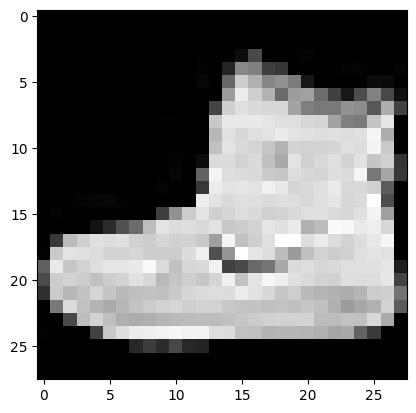

In [49]:
plt.imshow(image.squeeze(),cmap="gray")

# ---------------

loss funtions and optimizer

In [50]:
from helper_functions import accuracy_fn
from tqdm.auto import tqdm
lossftn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnnmodel1.parameters(), lr=0.01)

In [51]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

from timeit import default_timer as timer
traintime = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    trainstep(cnnmodel1,traindataloader,lossfn,optimizer,accuracy_fn,device=device)
    teststep(cnnmodel1,testdataloader,lossfn,accuracy_fn,device=device)

traintimeend = timer()
printtime(traintime,traintimeend,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

looked at batch 0 / 60000 samples 

looked at batch 12800 / 60000 samples 

looked at batch 25600 / 60000 samples 

looked at batch 38400 / 60000 samples 

looked at batch 51200 / 60000 samples 

train loss : 1.0378, train acc : 62.33%


 33%|███▎      | 1/3 [00:10<00:21, 10.54s/it]

 test loss : 0.6256 , accuracy : 76.91
looked at batch 0 / 60000 samples 

looked at batch 12800 / 60000 samples 

looked at batch 25600 / 60000 samples 

looked at batch 38400 / 60000 samples 

looked at batch 51200 / 60000 samples 

train loss : 0.5494, train acc : 80.01%


 67%|██████▋   | 2/3 [00:19<00:09,  9.90s/it]

 test loss : 0.4983 , accuracy : 81.57
looked at batch 0 / 60000 samples 

looked at batch 12800 / 60000 samples 

looked at batch 25600 / 60000 samples 

looked at batch 38400 / 60000 samples 

looked at batch 51200 / 60000 samples 

train loss : 0.4558, train acc : 83.52%


100%|██████████| 3/3 [00:29<00:00,  9.84s/it]

 test loss : 0.4403 , accuracy : 84.24
29.5267


29.526727542000117

# EvalGPU

In [52]:
torch.manual_seed(42)

def evalmodelgpu(model:torch.nn.Module,dataloader: torch.utils.data.DataLoader,lossfn:torch.nn.Module,accuracy_fn,device:torch.device):
    loss,acc =0,0
    model.eval().to(device)
    with torch.inference_mode():
        for x,y in tqdm(dataloader):
            x,y = x.to(device),y.to(device)
            yprediction = model(x).to(device)
            loss+= lossfn(yprediction,y)
            acc += accuracy_fn(y_true=y,y_pred=yprediction.argmax(dim=1))
        loss/=len(dataloader)
        acc/=len(dataloader)
    return {"model:" : model.__class__.__name__,
            "loss:" : loss.item(),
            "accuracy:" : acc}

modelresult = evalmodel(model_0,traindataloader,lossfn,accuracy_fn,device)
modelresult


100%|██████████| 1875/1875 [00:01<00:00, 1512.82it/s]


{'model:': 'fashinmnist',
 'loss:': 0.4302608370780945,
 'accuracy:': 84.94166666666666}

In [53]:
cnnresult = evalmodelgpu(cnnmodel1,testdataloader,lossfn,accuracy_fn,device=device)
cnnresult

100%|██████████| 313/313 [00:00<00:00, 404.43it/s]


{'model:': 'CNN', 'loss:': 0.4402695298194885, 'accuracy:': 84.23522364217253}

In [54]:
#Ai model_1
model_1result = evalmodelgpu(model_1, testdataloader, lossfn, accuracy_fn,device=device)
model_1result

100%|██████████| 313/313 [00:00<00:00, 539.89it/s]


{'model:': 'FashionMNISTModelImproved',
 'loss:': 0.4990769028663635,
 'accuracy:': 82.38817891373802}

In [55]:
import pandas as pd
compareresults = pd.DataFrame([modelresult,model_1result,cnnresult],columns=["model:","loss:","accuracy:"])

In [56]:
compareresults

,model:,loss:,accuracy:
0,fashinmnist,0.430261,84.941667
1,FashionMNISTModelImproved,0.499077,82.388179
2,CNN,0.440270,84.235224


In [57]:
def makeprediction(model:torch.nn.Module,
                   data:list,
                   device:torch.device=device):
    predprobs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in tqdm(data):
            sample = torch.unsqueeze(sample,0).to(device)
            predlogit = model(sample)
            predprob = torch.softmax(predlogit.squeeze(),dim=0)
            predprobs.append(predprob)
    return torch.stack(predprobs)


In [58]:
import random
random.seed(42)
testsamples =[]
testlabels=[]
for sample,label in random.sample(list(testdata),k=9):
    testsamples.append(sample)
    testlabels.append(label)


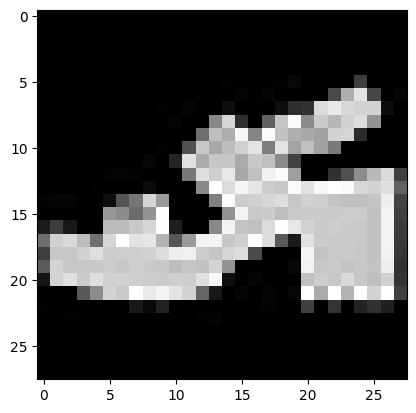

In [59]:
plt.imshow(testsamples[0].squeeze(),cmap="gray")

In [60]:
predprobs = makeprediction(cnnmodel1,testsamples)
predprobs

100%|██████████| 9/9 [00:00<00:00, 101.58it/s]


tensor([[1.3779e-07, 2.5421e-08, 5.3114e-08, 5.1959e-08, 9.6978e-09, 9.6610e-01,
         6.9227e-08, 6.7270e-05, 4.4343e-04, 3.3390e-02],
        [2.9299e-02, 7.6462e-01, 7.2421e-04, 1.9395e-01, 7.5274e-03, 5.8352e-05,
         3.0239e-03, 1.2707e-04, 6.6838e-04, 3.4535e-06],
        [1.5853e-06, 1.8182e-07, 1.0032e-06, 3.0328e-06, 2.5963e-07, 5.8972e-03,
         2.0194e-06, 6.8210e-01, 3.7146e-03, 3.0828e-01],
        [3.3154e-03, 2.6176e-04, 5.1980e-01, 5.5761e-03, 4.5716e-01, 1.5041e-08,
         1.3391e-02, 4.3729e-09, 5.0057e-04, 5.4199e-09],
        [5.2283e-02, 1.9085e-04, 4.3228e-05, 9.3954e-01, 8.0879e-05, 4.9855e-08,
         7.8411e-03, 4.8515e-06, 1.7644e-05, 3.9099e-06],
        [7.1946e-01, 1.0525e-03, 1.4726e-03, 9.9870e-03, 1.8036e-03, 2.3621e-08,
         2.6618e-01, 3.4567e-08, 4.1212e-05, 2.7013e-08],
        [8.5795e-05, 1.4420e-04, 1.0041e-02, 2.5284e-06, 9.7441e-01, 2.3675e-07,
         1.5232e-02, 1.1963e-11, 8.3539e-05, 3.0392e-09],
        [8.3502e-05, 2.9637

In [61]:
predclasses = predprobs.argmax(dim=1)
predclasses

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1], device='mps:0')

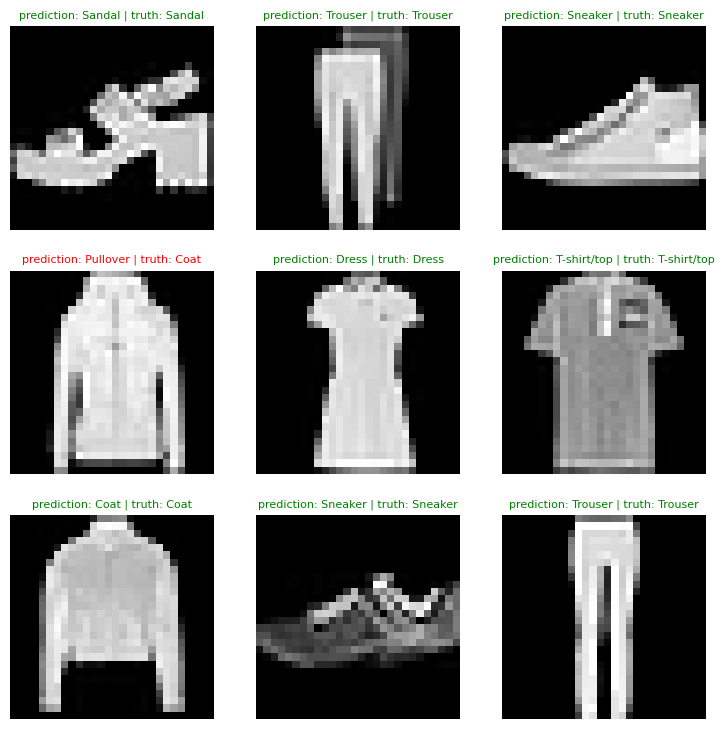

In [62]:
#plot predictions
plt.figure(figsize=(9,9))
nrow = 3
ncol = 3
for i,sample in enumerate(testsamples):
    plt.subplot(nrow,ncol,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")
    predlabel = classnames[predclasses[i]]
    truthlable = classnames[testlabels[i]]
    titletext = f"prediction: {predlabel} | truth: {truthlable}"
    if predlabel == truthlable:
        plt.title(titletext,fontsize=8,c='g')
    else:
        plt.title(titletext,fontsize=8,c='r')
    plt.axis('off')

## confusion matrix

In [63]:
import mlxtend

In [64]:
ypreds = []
cnnmodel1.eval()
with torch.inference_mode():
    for x,y in tqdm(testdataloader):
        x,y = x.to(device),y.to(device)
        ylogit = cnnmodel1(x)
        ypred = torch.softmax(ylogit, dim=1).argmax(dim=1)
        ypreds.append(ypred)
ypredtensor = torch.cat(ypreds)
print(len(ypreds))
print(len(ypredtensor))

100%|██████████| 313/313 [00:00<00:00, 535.74it/s]


313
10000


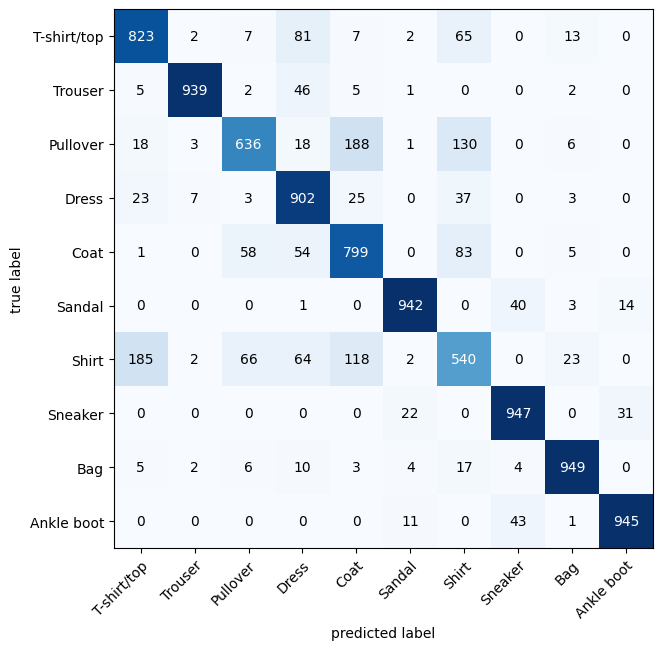

In [65]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(classnames),task="multiclass").to(device)
confmattensor = confmat(preds=ypredtensor, target=testdata.targets.to(device)).to(device)

fig,ax = plot_confusion_matrix(conf_mat=confmattensor.cpu().numpy(),
                               class_names=classnames,
                               figsize=(10,7))

In [66]:
confmattensor

tensor([[823,   2,   7,  81,   7,   2,  65,   0,  13,   0],
        [  5, 939,   2,  46,   5,   1,   0,   0,   2,   0],
        [ 18,   3, 636,  18, 188,   1, 130,   0,   6,   0],
        [ 23,   7,   3, 902,  25,   0,  37,   0,   3,   0],
        [  1,   0,  58,  54, 799,   0,  83,   0,   5,   0],
        [  0,   0,   0,   1,   0, 942,   0,  40,   3,  14],
        [185,   2,  66,  64, 118,   2, 540,   0,  23,   0],
        [  0,   0,   0,   0,   0,  22,   0, 947,   0,  31],
        [  5,   2,   6,  10,   3,   4,  17,   4, 949,   0],
        [  0,   0,   0,   0,   0,  11,   0,  43,   1, 945]], device='mps:0')

In [68]:
from pathlib import Path
modelpath = Path("model")
modelpath.mkdir(parents=True,exist_ok=True)
modelname = "CNNModel.pth"
modelsavepath = modelpath/modelname

torch.save(obj=cnnmodel1.state_dict(),f=modelsavepath)

In [69]:
loadedcnnmodel =CNN(input_shape=1,hidden_units=10,output_shape=len(classnames))

In [70]:
loadedcnnmodel.load_state_dict(torch.load(modelsavepath))

<All keys matched successfully>

In [71]:
loadedcnnmodel.to(device)

CNN(
  (convblock): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [82]:
from helper_functions import accuracy_fn
torch.manual_seed(42)
loadedcnnmodelresult = evalmodelgpu(model=loadedcnnmodel,dataloader=testdataloader,lossfn=lossftn,accuracy_fn=accuracy_fn,device=device)

100%|██████████| 313/313 [00:00<00:00, 384.68it/s]


In [83]:
loadedcnnmodelresult

{'model:': 'CNN', 'loss:': 0.4402695298194885, 'accuracy:': 84.23522364217253}

In [91]:
torch.isclose(torch.tensor(cnnresult["loss:"]),
              torch.tensor(loadedcnnmodelresult["loss:"]),
              atol=1e-02)

tensor(True)